In [2]:
import csv
import seaborn as sns
import pandas as pd
sns.set_theme()
sns.despine()

<Figure size 640x480 with 0 Axes>

In [3]:
countries = []

with open('/Users/danjonaitis/Documents/GitHub/weekly-projects/crt-surveillance/data/trade-register.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        found = False
        for country in countries:
            if country[0] == row['Recipient']:
                country[1] += float(row['SIPRI_TIV_of_delivered_weapons'])
                found = True
                break
        if not found:
            countries.append([row['Recipient'], float(row['SIPRI_TIV_of_delivered_weapons'])])


In [4]:
df = pd.DataFrame(countries, columns=['Country', 'Total value of weapons (millions)'])
df = df.sort_values(['Total value of weapons (millions)'], ascending=False)
display(df.head(80))


,Country,Total value of weapons (millions)
71,Japan,67815.80
127,Saudi Arabia,48999.15
75,South Korea,46704.02
51,Germany,42425.61
67,Israel,38000.19
...,...,...
30,China,210.60
23,Brunei,199.08
83,Lithuania,181.94
78,Laos,181.13


<Axes: xlabel='Total value of weapons (millions)', ylabel='Country'>

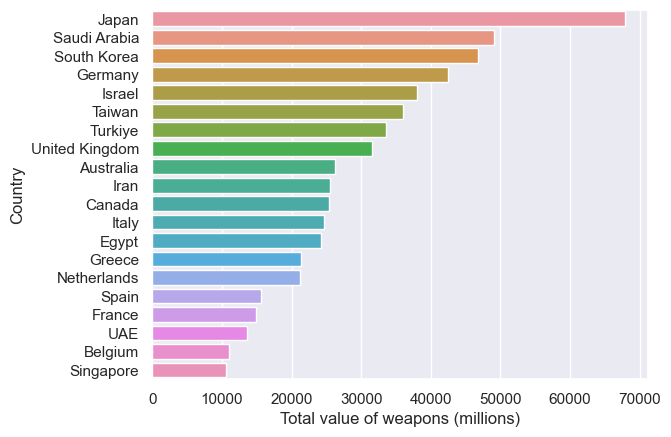

In [5]:
df20 = df.head(20)
sns.barplot(x="Total value of weapons (millions)", y="Country", data=df20)

<Axes: xlabel='Total', ylabel='Supplier'>

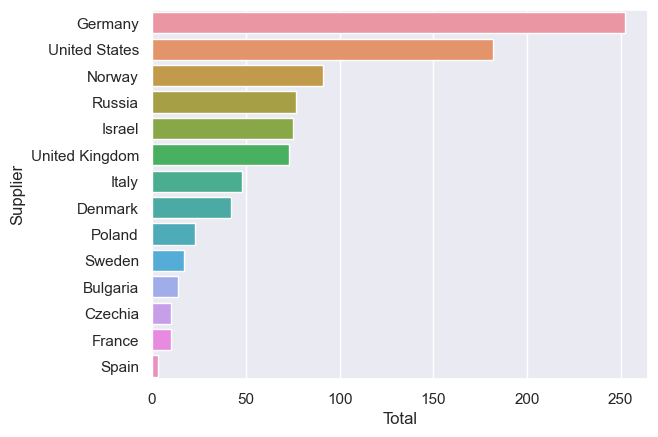

In [14]:
lithuanianImports = []
with open('/Users/danjonaitis/Documents/GitHub/weekly-projects/crt-surveillance/data/lithuanian_imports.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        lithuanianImports.append([row['Supplier'], float(row['Sum total years'])])

ltDF = pd.DataFrame(lithuanianImports, columns=['Supplier', 'Total'])

ltDF = ltDF.drop(14)
sns.barplot(x="Total", y="Supplier", data=ltDF)


In [25]:
ltTimeDF = pd.read_csv('/Users/danjonaitis/Documents/GitHub/weekly-projects/crt-surveillance/data/lithuanian_imports.csv')
ltTimeDF = ltTimeDF.fillna(0)
ltTimeDF = ltTimeDF.iloc[:, :35]
lt_melted = ltTimeDF.melt(id_vars=['Supplier'], var_name='Supplier')
sns.lineplot(data=lt_melted, x='Supplier', y='value', hue='Supplier')

ValueError: 2